<a href="https://colab.research.google.com/github/zoobiasyyed/ML-Projects/blob/main/genaiscript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Dropout, Dense, Bidirectional, Input, concatenate, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

The code is complete but because of the size of the [data set](https://www.kaggle.com/datasets/torloweidadata/movies-and-movie-scripts) it needs to be trained on the server. num_rows_to_read cuts off the amount of data to only 100 rows so that my runtime wouldn't crash. Once running on the server this will be taken off and all of the rows will be used.

In [ ]:
file_path = 'moviedataset.csv'
df = pd.read_csv('moviedataset.csv')
columns_to_keep = ['genres', 'Scripts']
df = df[columns_to_keep]
df.shape

(3923, 2)

In [ ]:
df = df.explode('genres')
df['genres'] = df['genres'].str.split(',').str[0].str.strip()
df = df.drop_duplicates()
df = df.reset_index(drop=True)

df['Scripts'] = df['Scripts'].astype(str)

df['Scripts'].fillna('', inplace=True)

In [ ]:
df.head()

,genres,Scripts
0,Drama,"Dearest, I feel certain that I am going mad ag..."
1,Adventure,Al That was when the icecaps had melted becaus...
2,Drama,"- MICHAEL: Hi, sis. - CAROLYN: Hey. - CAROLYN:..."
3,Comedy,"Good luck. Hi. Uh, I have an appointment with ..."
4,Drama,THE HOUSE OF THE SPIRITS. It’s good to be back...


In [ ]:
# Tokenization and text cleaning
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["Scripts"])
total_words = len(tokenizer.word_index) + 1

In [ ]:
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df["Scripts"])
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

In [ ]:
# Encode genres
label_encoder = LabelEncoder()
encoded_genres = label_encoder.fit_transform(df["genres"])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_genres, test_size=0.2, random_state=48)

///// NEW

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Dropout, Dense

# Total words in the vocabulary
total_words = len(tokenizer.word_index) + 1

# Number of unique genres
num_classes = len(df['genres'].unique())

# Assuming you have determined max_sequence_length
max_sequence_length = max(len(seq) for seq in sequences)

model = Sequential()
model.add(Embedding(total_words, 150, input_length=max_sequence_length))
model.add(Conv1D(64, 5, activation='relu'))  # 1D Convolutional layer
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model = Sequential()
model.add(Embedding(total_words, 150, input_length = max_sequences_length))
model.add(Conv1D(64, 5, activation = 'relu'))
model.add(MaxPooling1D(pool_size = 4))
model.add(LSTM(100, return_sequences = True))

print(model.summary())

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 29684, 150)        21749700  
                                                                 
 conv1d (Conv1D)             (None, 29680, 64)         48064     
                                                                 
 max_pooling1d (MaxPooling1  (None, 7420, 64)          0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 7420, 100)         66000     
                                                                 
 lstm_1 (LSTM)               (None, 7420, 100)         80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                        

In [ ]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), batch_size=128)

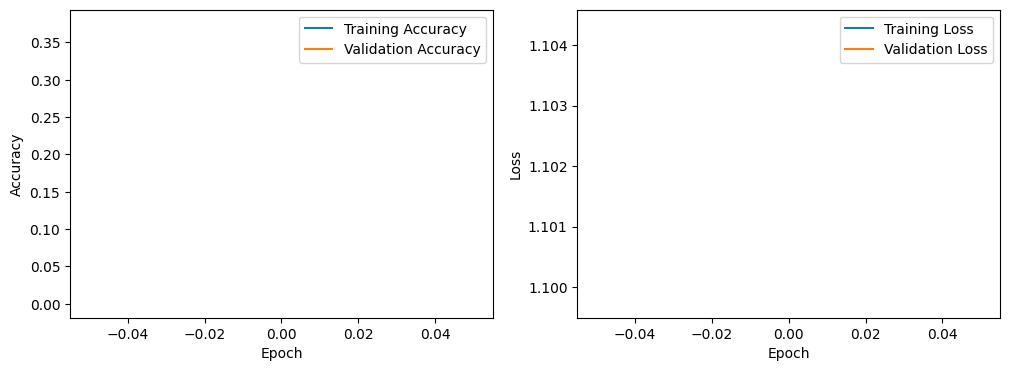

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Example #1: Drama

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import numpy as np

# Load the text from the file
with open('/content/panic-room.html', 'r', encoding='utf-8') as file:
    movie_script = file.read()

# Tokenize and pad the new script
sequences = tokenizer.texts_to_sequences([movie_script])
padded_sequence = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Make predictions
predictions = model.predict(padded_sequence)

# Decode the predictions to genre labels
predicted_genre_index = np.argmax(predictions)
predicted_genre = label_encoder.classes_[predicted_genre_index]

print(f'The predicted genre for drama movie (Panic Room) is: {predicted_genre}')


1/1 [==============================] - 2s 2s/step
The predicted genre for drama movie (Panic Room) is: Comedy


Example #2: Comedy

In [ ]:
# Load the text from the file
with open('/content/ELF.html', 'r', encoding='utf-8') as file:
    movie_script = file.read()

# Tokenize and pad the new script
sequences = tokenizer.texts_to_sequences([movie_script])
padded_sequence = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Make predictions
predictions = model.predict(padded_sequence)

# Decode the predictions to genre labels
predicted_genre_index = np.argmax(predictions)
predicted_genre = label_encoder.classes_[predicted_genre_index]

print(f'The predicted genre for comedy movie (Elf) is: {predicted_genre}')

1/1 [==============================] - 2s 2s/step
The predicted genre for comedy movie (Elf) is: Comedy


Example #3: Scary Movie

In [ ]:
# Load the text from the file
with open('/content/_PET SEMATARY_ by Stephen King.html', 'r', encoding='utf-8') as file:
    movie_script = file.read()

# Tokenize and pad the new script
sequences = tokenizer.texts_to_sequences([movie_script])
padded_sequence = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Make predictions
predictions = model.predict(padded_sequence)

# Decode the predictions to genre labels
predicted_genre_index = np.argmax(predictions)
predicted_genre = label_encoder.classes_[predicted_genre_index]

print(f'The predicted genre for scary movie (Pet Sematary) is: {predicted_genre}')

1/1 [==============================] - 2s 2s/step
The predicted genre for scary movie (Pet Sematary) is: Comedy


Example #4: Parody Movie

In [ ]:
# Load the text from the file
with open('/content/_Scary Movie 2_.html', 'r', encoding='utf-8') as file:
    movie_script = file.read()

# Tokenize and pad the new script
sequences = tokenizer.texts_to_sequences([movie_script])
padded_sequence = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Make predictions
predictions = model.predict(padded_sequence)

# Decode the predictions to genre labels
predicted_genre_index = np.argmax(predictions)
predicted_genre = label_encoder.classes_[predicted_genre_index]

print(f'The predicted genre for parody movie (Scary Movie 2) is: {predicted_genre}')

1/1 [==============================] - 1s 1s/step
The predicted genre for parody movie (Scary Movie 2) is: Comedy


Example #6: Small section of script

In [ ]:
# Load the text from the file
with open('/content/Godfather, The.txt', 'r', encoding='utf-8') as file:
    movie_script = file.read()

# Tokenize and pad the new script
sequences = tokenizer.texts_to_sequences([movie_script])
padded_sequence = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Make predictions
predictions = model.predict(padded_sequence)

# Decode the predictions to genre labels
predicted_genre_index = np.argmax(predictions)
predicted_genre = label_encoder.classes_[predicted_genre_index]

print(f'The predicted genre for Ferris Buellers Day Off (but using only a scene where the characters are fighting) is: {predicted_genre}')

1/1 [==============================] - 1s 979ms/step
The predicted genre for Ferris Buellers Day Off (but using only a scene where the characters are fighting) is: Comedy
